In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm
import plotly.express as px

In [2]:
# # 전처리 모듈 preprocess_ 호출하여 전처리하기
# import preprocess_
# pre_ = preprocess_.pre()
# data = pre_.preprocess__(path="./datasets_arima/KS200.csv", slice=['날짜', '종가'], column_=['Date', 'KS200'])

In [3]:
data = pd.read_csv('./datasets/KS200.csv')

In [4]:
data

,Date,KS200
0,2000-12-26,63.35
1,2001-01-02,65.41
2,2001-01-03,65.38
3,2001-01-04,70.14
4,2001-01-05,73.15
...,...,...
5268,2022-04-25,348.98
5269,2022-04-26,350.67
5270,2022-04-27,346.21
5271,2022-04-28,350.16


In [5]:
# xticks에 날짜를 표시하기 위해 Date열을 데이터프레임에 인덱스로 넣어주고 기존의 Date열 삭제
data_a = data[('2019-01-01' < data['Date']) & (data['Date'] <= '2022-04-30')]
data_a.set_index(data_a['Date'], inplace=True)

# 시각화 확인
fig = px.line(data_a, x='Date', y='KS200')
fig.show()

In [6]:
# train_1, target_1, target_2, target_3
# 2020/1/19 ~ 2020/2/17을 train
train_1 = data[('2020-01-19' < data['Date']) & (data['Date'] <= '2020-02-17')]
target_1 = data[('2020-02-17' < data['Date']) & (data['Date'] <= '2020-03-19')]
target_2 = data[('2020-02-17' < data['Date']) & (data['Date'] <= '2020-07-31')]
target_3 = data[('2020-02-17' < data['Date']) & (data['Date'] <= '2022-04-30')]

# xticks에 날짜를 표시하기 위해 Date열을 데이터프레임에 인덱스로 넣어주고 기존의 Date열 삭제
train_1.set_index(train_1['Date'], inplace=True)
train_1.drop('Date', axis=1, inplace=True)
train_1 = np.log1p(train_1)
target_1.set_index(target_1['Date'], inplace=True)
target_1.drop('Date', axis=1, inplace=True)
target_1 = np.log1p(target_1)
target_2.set_index(target_2['Date'], inplace=True)
target_2.drop('Date', axis=1, inplace=True)
target_2 = np.log1p(target_2)
target_3.set_index(target_3['Date'], inplace=True)
target_3.drop('Date', axis=1, inplace=True)
target_3 = np.log1p(target_3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
# train_2
# 2020/1/1 ~ 2020/2/17을 train
train_2 = data[('2020-01-01' < data['Date']) & (data['Date'] <= '2020-02-17')]

# xticks에 날짜를 표시하기 위해 Date열을 데이터프레임에 인덱스로 넣어주고 기존의 Date열 삭제
train_2.set_index(train_2['Date'], inplace=True)
train_2.drop('Date', axis=1, inplace=True)
train_2 = np.log1p(train_2)

In [8]:
# train_3
# 2019/1/1 ~ 2020/2/17을 train
train_3 = data[('2019-01-01' < data['Date']) & (data['Date'] <= '2020-02-17')]

# xticks에 날짜를 표시하기 위해 Date열을 데이터프레임에 인덱스로 넣어주고 기존의 Date열 삭제
train_3.set_index(train_3['Date'], inplace=True)
train_3.drop('Date', axis=1, inplace=True)
train_3 = np.log1p(train_3)

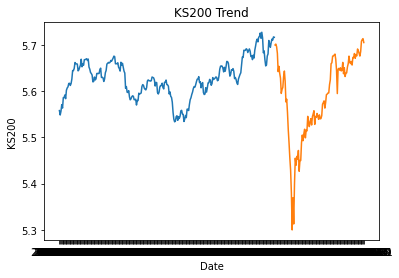

In [9]:
plt.plot(train_3)
plt.plot(target_2)

# rotation 45를 넣지 않으면 xtick의 날짜끼리 겹쳐서 제대로 보이지 않음
# plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('KS200')
plt.title('KS200 Trend')
# plt.legend(['0120_0217', '0218_0319'])
plt.show()

In [10]:
# 2020/1/19 ~ 2020/2/17을 train_1, 차수선정
kpss_diffs = ndiffs(train_1['KS200'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_1['KS200'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 3


In [11]:
# 2020/1/1 ~ 2020/2/17을 train_2, 차수선정
kpss_diffs_ = ndiffs(train_2['KS200'], alpha=0.05, test='kpss', max_d=6)
adf_diffs_ = ndiffs(train_2['KS200'], alpha=0.05, test='adf', max_d=6)
n_diffs_ = max(adf_diffs_, kpss_diffs_)

print(f"추정된 차수 d = {n_diffs_}")

추정된 차수 d = 3


In [12]:
# 2019/1/1 ~ 2020/2/17을 train_3, 차수선정
kpss_diffs_ = ndiffs(train_3['KS200'], alpha=0.05, test='kpss', max_d=6)
adf_diffs_ = ndiffs(train_3['KS200'], alpha=0.05, test='adf', max_d=6)
n_diffs_ = max(adf_diffs_, kpss_diffs_)

print(f"추정된 차수 d = {n_diffs_}")

추정된 차수 d = 1


In [13]:
# 2020/1/19 ~ 2020/2/17을 train, train_1 추정차수 d = 3
model_1 = pm.auto_arima(y = train_1['KS200']        # 데이터
                      , d = 3            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-60.143, Time=0.03 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-65.091, Time=0.05 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-72.045, Time=0.05 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-72.873, Time=0.05 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-74.330, Time=0.04 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-72.016, Time=0.04 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-71.824, Time=0.06 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-69.384, Time=0.10 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-68.268, Time=0.03 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-72.808, Time=0.06 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=-71.561, Time=0.07 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.700 seconds


In [14]:
# 2020/1/1 ~ 2020/2/17을 train, train_2 추정차수 d = 3
model_2 = pm.auto_arima(y = train_2['KS200']        # 데이터
                      , d = 3            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-112.205, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-129.103, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-139.210, Time=0.01 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-142.420, Time=0.04 sec
 ARIMA(4,3,0)(0,0,0)[0]             : AIC=-140.580, Time=0.09 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-145.680, Time=0.06 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-147.763, Time=0.04 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-146.686, Time=0.04 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-144.484, Time=0.06 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-146.936, Time=0.06 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-143.708, Time=0.08 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=-143.289, Time=0.03 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.567 seconds


In [15]:
# 2019/1/1 ~ 2020/2/17을 train, train_3 추정차수 d = 1
model_3 = pm.auto_arima(y = train_3['KS200']        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1815.648, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1814.150, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1814.066, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1816.515, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1808.339, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.134 seconds


In [16]:
# 2020/1/19 ~ 2020/2/17을 train
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 3, 1)   Log Likelihood                  41.165
Date:                Wed, 04 May 2022   AIC                            -74.330
Time:                        16:06:23   BIC                            -71.239
Sample:                             0   HQIC                           -74.172
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6596      0.316     -2.089      0.037      -1.278      -0.041
ar.L2         -0.3955      0.295     -1.342      0.180      -0.973       0.182
ma.L1         -0.9340      0.760     -1.228      0.2

In [17]:
# 2020/1/1 ~ 2020/2/17을 train
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(2, 3, 1)   Log Likelihood                  77.881
Date:                Wed, 04 May 2022   AIC                           -147.763
Time:                        16:06:23   BIC                           -142.434
Sample:                             0   HQIC                          -146.134
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7361      0.212     -3.478      0.001      -1.151      -0.321
ar.L2         -0.3251      0.210     -1.551      0.121      -0.736       0.086
ma.L1         -0.9629      0.358     -2.691      0.0

In [18]:
# 2019/1/1 ~ 2020/2/17을 train
print(model_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  277
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 909.258
Date:                Wed, 04 May 2022   AIC                          -1816.515
Time:                        16:06:23   BIC                          -1812.895
Sample:                             0   HQIC                         -1815.062
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.046e-05   5.66e-06     14.208      0.000    6.94e-05    9.16e-05
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                18.04
Prob(Q):                              0.48   Pr

### Ljung-Box(=Prob(Q)) :  일정 기간 동안 일련의 관측치가 랜덤이고 독립적인지 여부를 검사하는데 사용된다
    - 자기 상관 관계에서 시점간의 상관 관계를 의미하며, 자기 상관관계로 인하여 시계열 모형의 정확도를 떨어뜨리는 원인이 되기도 한다.
    - 귀무가설 : 자기상관성이 없다. 상관계수=0 / 대립가설 : 자기상관성이 있다. 상관계수≠0
    - Prob(Q)가 유의수준(0.05)보다 작으면 귀무가설을 기각하여 자기상관성이 존재한다는 의미이다.

### Jarque-Bera(=Prob(JB)) : 왜도와 첨도가 정규분포로 보기에 적합한지에 대한 적합도 검정에 사용한다
    - 귀무가설 : 데이터는 정규분포를 따른다. / 대립가설 : 데이터는 정규분포를 따르지 않는다.
    - Prob(JB)가 유의수준(0.05)보다 작으면 귀무가설을 기각하여 데이터는 정규분포를 따르지 않는다는 의미이다.

### Heteroskedasticity(=Prob(H)) : 각 시간대 별 잔차의 분산이 일정한지 보는 테스트
    - 귀무가설 : 잔차의 분산이 일정하다 / 대립가설 잔차의 분산이 일정하지 않다.
    - Prob(H)가 유의수준(0.05)보다 작으면 귀무가설을 기각하여 잔차의 분산이 일정하지 않다는 의미이다.

### Skew (왜도) : 분포가 정규분포에 비해 얼마나 비대칭인지 나타내는 척도

### Kurtosis (첨도) = 샘플의 점수가 평균을 중심으로 가까링 몰려 있을수록 분포의 정점은 더욱 뾰족한 모양. 즉 첨도가 커진다.


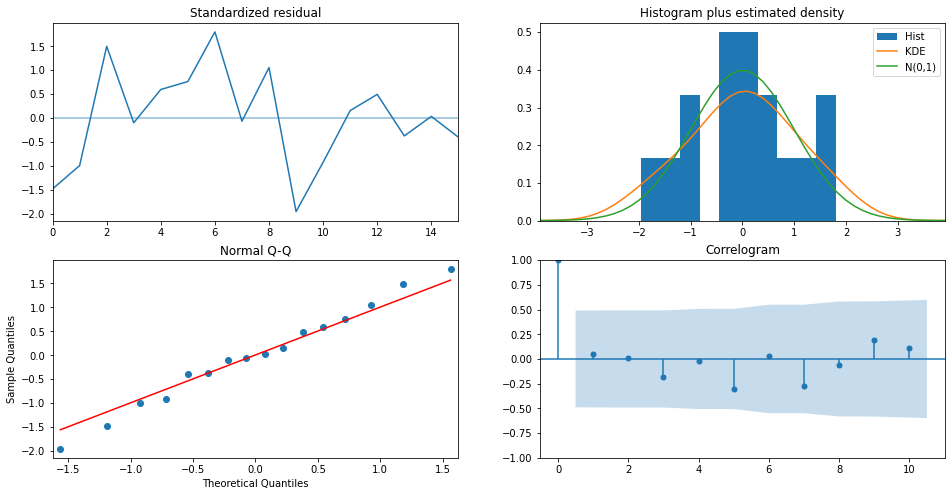

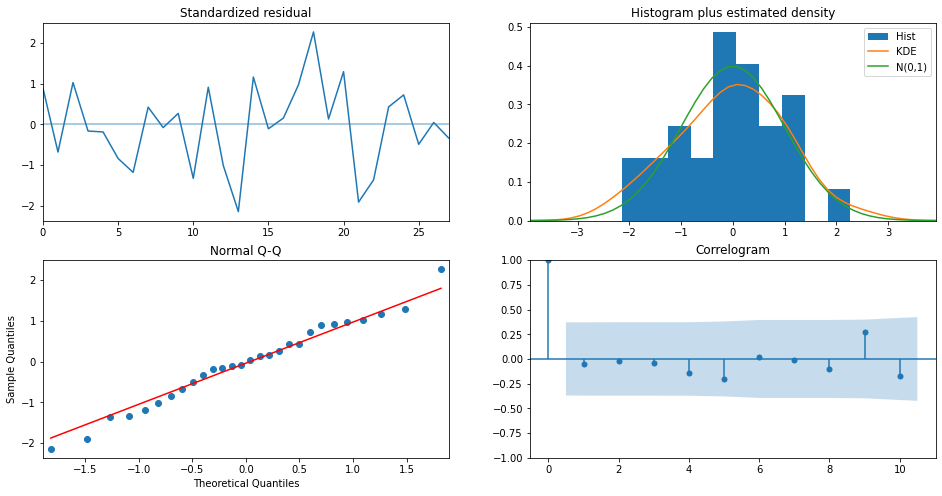

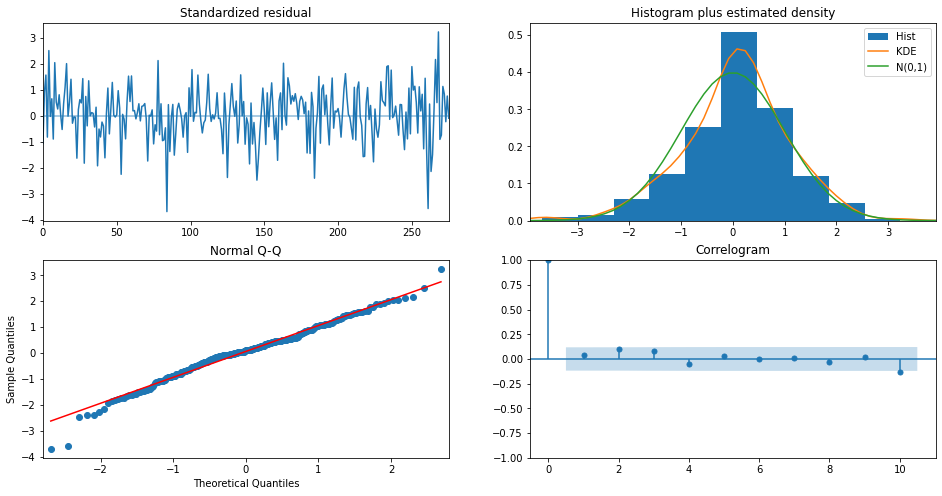

In [19]:
# 2020/1/19 ~ 2020/2/17을 train
model_1.plot_diagnostics(figsize=(16, 8))
# 2020/1/1 ~ 2020/2/17을 train
model_2.plot_diagnostics(figsize=(16, 8))
# 2019/1/1 ~ 2020/2/17을 train
model_3.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Standardized residual : 잔차를 시계열로 그린 것
#### Correlogram : 잔차에 대한 ACF와 허용범위를 나타낸 것
    - ACF란? 자기상관함수 (AutoCorrelation Function) 으로써 시차에 따른 일련의 자기상관을 의미하며 시차가 커질 수록 0에 가까워진다. 정상 시계열은 빠르게 0으로 수렴하며, 비정상 시계열은 천천히 감소하고 종종 양의 큰 값을 가진다
#### Histogram plus estimated density : 잔차의 히스토그램을 그려 정규분포 N(0,1)과 밀도를 추정한 그래프를 같이 겹쳐서 보여주는 것. 
#### Normal Q-Q : 수집데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프로 데이터의 정규성 가정에 대한 검토를 가능하게 한다. 모집단이 정규성을 따른다면 직선의 형태로 그려지게 된다.

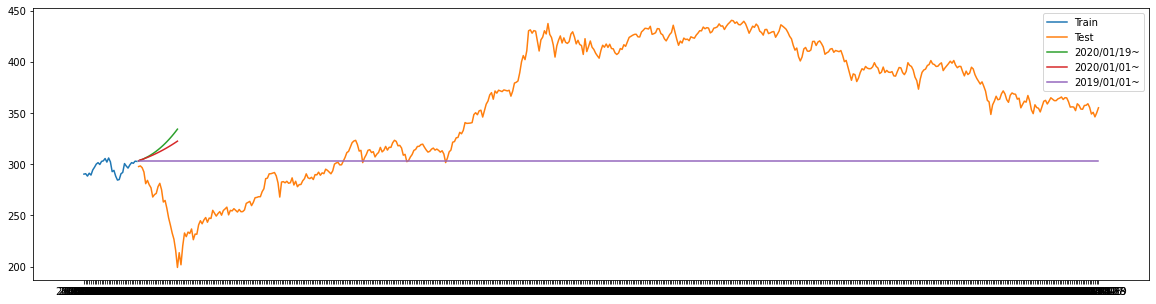

In [20]:
# 2020/1/19 ~ 2020/2/17을 train
y_predict_1 = model_1.predict(n_periods=len(target_1['KS200'])) 
y_predict_1 = pd.DataFrame(y_predict_1, index = target_1['KS200'].index, columns=['Prediction_1'])
# 2020/1/1 ~ 2020/2/17을 train
y_predict_2 = model_2.predict(n_periods=len(target_1['KS200'])) 
y_predict_2 = pd.DataFrame(y_predict_2, index = target_1['KS200'].index, columns=['Prediction_2'])
# 2019/1/1 ~ 2020/2/17을 train
y_predict_3 = model_3.predict(n_periods=len(target_3['KS200'])) 
y_predict_3 = pd.DataFrame(y_predict_3, index = target_3['KS200'].index, columns=['Prediction_3'])

# # 그래프 (로그 한번)
# fig, axes = plt.subplots(1, 1, figsize=(12, 4))
# plt.plot((train_2['KS200']), label='Train')  # 훈련 데이터
# plt.plot((target_3['KS200']), label='Test')    # 테스트 데이터
# plt.plot((y_predict_1), label='2020/01/19~') # 예측 데이터 (2020/01/19~ 훈련)
# plt.plot((y_predict_2), label='2020/01/01~') # 예측 데이터 (2020/01/01~ 훈련)
# plt.plot((y_predict_3), label='2019/01/01~') # 예측 데이터 (2019/01/01~ 훈련)
# plt.legend()
# plt.show()

# # 그래프 (로그 한번 더)
# fig, axes = plt.subplots(1, 1, figsize=(12, 4))
# plt.plot(np.log1p(train_2['KS200']), label='Train')  # 훈련 데이터
# plt.plot(np.log1p(target['KS200']), label='Test')    # 테스트 데이터
# plt.plot(np.log1p(y_predict_1), label='2020/01/19~') # 예측 데이터 (2020/01/19~ 훈련)
# plt.plot(np.log1p(y_predict_2), label='2020/01/01~') # 예측 데이터 (2020/01/01~ 훈련)
# plt.plot(np.log1p(y_predict_3), label='2019/01/01~') # 예측 데이터 (2019/01/01~ 훈련)
# plt.legend()
# plt.show()

# 그래프 (로그 풀고)
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
plt.plot(np.expm1(train_2['KS200']), label='Train')  # 훈련 데이터
plt.plot(np.expm1(target_3['KS200']), label='Test')    # 테스트 데이터
plt.plot(np.expm1(y_predict_1), label='2020/01/19~') # 예측 데이터 (2020/01/19~ 훈련)
plt.plot(np.expm1(y_predict_2), label='2020/01/01~') # 예측 데이터 (2020/01/01~ 훈련)
plt.plot(np.expm1(y_predict_3), label='2019/01/01~') # 예측 데이터 (2019/01/01~ 훈련)
plt.legend()
plt.show()

In [21]:
# 관측치를 추가함으로써 모형을 refresh하고 이로 인해 AIC, 로그 가능도가 다시 계산되고 가장 마지막 관측치가 업데이트된다
# AIC(Akaike Information Criterion)란? 두 확률분포 사이의 차이를 표현한 것. 실제 데이터의 분포와 모형이 예측하는 분포 사이의 차이
# AIC가 작다는 것은 모형이 자료의 진짜 분포와 비슷하게 생겼다는 것
# 쉽게 설명한 곳 : https://student9725.tistory.com/28
# 좀 더 깊게 설명한 곳 : https://rk1993.tistory.com/entry/AIC-BIC-Mallows-Cp-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0
def forecast_one_step(model):
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [44]:
# step 이동시 사용
# target_input = target_1, target_2, target_3

target_input = target_3

In [23]:
forecasts_1 = []
y_pred_1 = []
pred_upper_1 = []
pred_lower_1 = []

for new_ob_1 in target_input['KS200']:
    fc, conf = forecast_one_step(model_1)
    y_pred_1.append(fc)
    pred_upper_1.append(conf[1])
    pred_lower_1.append(conf[0])

    ## 모형 업데이트 !!
    model_1.update(new_ob_1)

In [24]:
forecasts_2 = []
y_pred_2 = []
pred_upper_2 = []
pred_lower_2 = []

for new_ob_2 in target_input['KS200']:
    fc_, conf_ = forecast_one_step(model_2)
    y_pred_2.append(fc_)
    pred_upper_2.append(conf_[1])
    pred_lower_2.append(conf_[0])

    ## 모형 업데이트 !!
    model_2.update(new_ob_2)

In [45]:
forecasts_3 = []
y_pred_3 = []
pred_upper_3 = []
pred_lower_3 = []

for new_ob_3 in target_input['KS200']:
    fc, conf = forecast_one_step(model_3)
    y_pred_3.append(fc)
    pred_upper_3.append(conf[1])
    pred_lower_3.append(conf[0])

    ## 모형 업데이트 !!
    model_3.update(new_ob_3)

In [43]:
print(model_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  438
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 885.512
Date:                Wed, 04 May 2022   AIC                          -1769.023
Time:                        16:11:43   BIC                          -1764.943
Sample:                             0   HQIC                         -1767.413
                                - 438                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0010   9.17e-06    110.989      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   4.83   Jarque-Bera (JB):            227558.79
Prob(Q):                              0.03   Pr

In [26]:
pd.DataFrame({"test": np.expm1(target_input['KS200']), "pred": np.expm1(y_pred_1)})

,test,pred
Date,,
2020-02-18,297.74,303.124116
2020-02-19,298.33,296.493205
2020-02-20,296.65,297.095397
2020-02-21,292.42,293.945712
2020-02-24,281.02,290.560707
2020-02-25,284.24,274.568356
2020-02-26,279.94,280.876054
2020-02-27,277.09,274.202898
2020-02-28,268.02,276.263893


In [27]:
pd.DataFrame({"test": np.expm1(target_input['KS200']), "pred": np.expm1(y_pred_2)})

,test,pred
Date,,
2020-02-18,297.74,303.401050
2020-02-19,298.33,296.778410
2020-02-20,296.65,296.219698
2020-02-21,292.42,294.717900
2020-02-24,281.02,290.605852
2020-02-25,284.24,275.320785
2020-02-26,279.94,278.944837
2020-02-27,277.09,276.297636
2020-02-28,268.02,275.495922


In [28]:
pd.DataFrame({"test": np.expm1(target_input['KS200']), "pred": np.expm1(y_pred_3)})

,test,pred
Date,,
2020-02-18,297.74,302.76
2020-02-19,298.33,297.74
2020-02-20,296.65,298.33
2020-02-21,292.42,296.65
2020-02-24,281.02,292.42
2020-02-25,284.24,281.02
2020-02-26,279.94,284.24
2020-02-27,277.09,279.94
2020-02-28,268.02,277.09


In [29]:
print(model_1.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(2, 3, 1)   Log Likelihood                  94.108
Date:                Wed, 04 May 2022   AIC                           -180.216
Time:                        16:06:26   BIC                           -173.562
Sample:                             0   HQIC                          -177.829
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5950      0.208     -2.864      0.004      -1.002      -0.188
ar.L2         -0.3109      0.194     -1.601      0.109      -0.692       0.070
ma.L1         -0.9354      0.205     -4.566      0.0

In [30]:
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(2, 3, 1)   Log Likelihood                 128.726
Date:                Wed, 04 May 2022   AIC                           -249.452
Time:                        16:06:26   BIC                           -241.725
Sample:                             0   HQIC                          -246.500
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6247      0.162     -3.862      0.000      -0.942      -0.308
ar.L2         -0.2663      0.150     -1.776      0.076      -0.560       0.028
ma.L1         -0.9630      0.160     -6.026      0.0

In [31]:
print(model_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 899.257
Date:                Wed, 04 May 2022   AIC                          -1796.514
Time:                        16:06:26   BIC                          -1792.814
Sample:                             0   HQIC                         -1795.033
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   5.28e-06     27.090      0.000       0.000       0.000
Ljung-Box (L1) (Q):                  20.15   Jarque-Bera (JB):               834.03
Prob(Q):                              0.00   Pr

In [32]:
## 1월1일부터 학습시킨 모델의 예측 결과와 1월19일부터 학습시킨 모델의 예측결과가 그래프상으로는 두드러지게 나타나지 않았다.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 2020/1/19 ~ 2020/2/17 : train_1, y_pred_1
# 2020/1/1 ~ 2020/2/17 : train_2, y_pred_2
# 2019/1/1 ~ 2020/2/17 : train_3, y_pred_2
# 2020/2/18 ~ 2020/3/31 : target_1
# 2020/2/18 ~ 2020/7/31 : target_2
# 2020/2/18 ~ 2022/4/33 : target_3

fig = go.Figure([
    
    # 훈련 데이터(2020/1/19 ~ 2020/2/17)------------------------------------------------------------
    go.Scatter(x = train_1['KS200'].index, y = np.expm1(train_1['KS200']), name = "train_1", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 훈련 데이터(2020/1/1 ~ 2020/2/17)-----------------------------------------------------------
    , go.Scatter(x = train_2['KS200'].index, y = np.expm1(train_2['KS200']), name = "train_2", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 훈련 데이터(2019/1/1 ~ 2020/2/17)-----------------------------------------------------------
    , go.Scatter(x = train_3['KS200'].index, y = np.expm1(train_3['KS200']), name = "train_3", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터-----------------------------------------------------------------------
    , go.Scatter(x = target_input['KS200'].index, y = np.expm1(target_input['KS200']), name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값(2020/1/19 ~ 2020/2/17)-----------------------------------------------------------
    , go.Scatter(x = target_input['KS200'].index, y = np.expm1(y_pred_1), name = "Prediction_1", mode = 'lines'
                     ,line = dict(color = 'skyblue', dash = 'dot', width=3))     
    # 예측값(2020/1/1 ~ 2020/2/17)-----------------------------------------------------------
    , go.Scatter(x = target_input['KS200'].index, y = np.expm1(y_pred_2), name = "Prediction_2", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    # 예측값(2019/1/1 ~ 2020/2/17)-----------------------------------------------------------
    , go.Scatter(x = target_input['KS200'].index, y = np.expm1(y_pred_3), name = "Prediction_3", mode = 'lines'
                     ,line = dict(color = 'violet', dash = 'dot', width=3))               
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = target_input['KS200'].index.tolist() + target_input['KS200'].index[::-1].tolist() 
            ,y = np.expm1(pred_upper_3).tolist() + np.expm1(pred_lower_3[::-1]).tolist() ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
            ,fill='toself'
            ,fillcolor='rgba(0,0,30,0.1)'
            ,line=dict(color='rgba(0,0,0,0)')
            ,hoverinfo="skip"
            ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(2,3,1)모형",
                    xaxis=go.layout.XAxis(
                                            title=go.layout.xaxis.Title(
                                                text="Date",
                                                font=dict(
                                                    family="Courier New, monospace",
                                                    size=18,
                                                    )
                                                )
                                            ),
                    yaxis=go.layout.YAxis(
                        title=go.layout.yaxis.Title(
                            text="KS200",
                            font=dict(
                                family="Courier New, monospace",
                                size=18,
                                )
                            )
                        )
                    )
# fig_1.show()
fig.show()



In [33]:
# 학습을 1월 19일부터 시킨 모델과 1월 1일부터 시킨 모델의 차이 평균
# 1-20일을 더 학습시켰지만 크게 차이는 없었다?
a = np.mean([x-y for x,y in zip(np.expm1(y_pred_1), np.expm1(y_pred_2))])
b = np.mean([x-y for x,y in zip(np.expm1(y_pred_2), np.expm1(y_pred_3))])
c = np.mean([x-y for x,y in zip(np.expm1(y_pred_1), np.expm1(y_pred_3))])

print(a,b,c)

-0.06209256088197519 -3.360582441227854 -3.4226750021098296


In [34]:
# 2020/1/19 ~ 2020/2/17 train : train_1
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(np.expm1(target_input['KS200']), np.expm1(y_pred_1)):.3f}")
# MAPE: 0.792

MAPE: 1.882


In [35]:
# 2020/1/1 ~ 2020/2/17 train : train_2
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(np.expm1(target_input['KS200']), np.expm1(y_pred_2)):.3f}")
# MAPE: 0.792
# MAPE 차이로는 학습데이터를 조금 늘렸을 때 유의미한 차이가 없었다?

MAPE: 1.847


In [36]:
# 2019/1/1 ~ 2020/2/17 train : train_3
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(np.expm1(target_input['KS200']), np.expm1(y_pred_3)):.3f}")
# MAPE: 0.792
# MAPE 차이로는 학습데이터를 조금 늘렸을 때 유의미한 차이가 없었다?

MAPE: 2.451


### MAPE (mean absolute precentage error) MAE를 퍼센트로 변환한 것이다
    - MAE와 마찬가지로 MSE보다 특이치에 robust하다(상대적으로 영향을 덜 받는다--MSE는 제곱을 하기 때문)
    - MAE와 마찬가지로 절대값을 취하기 때문에 실제보다 높은지 낮은지 알 수 없다는 단점
